In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('creditcard.csv')
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

x = df.drop(columns=['Class'])
y = df['Class']

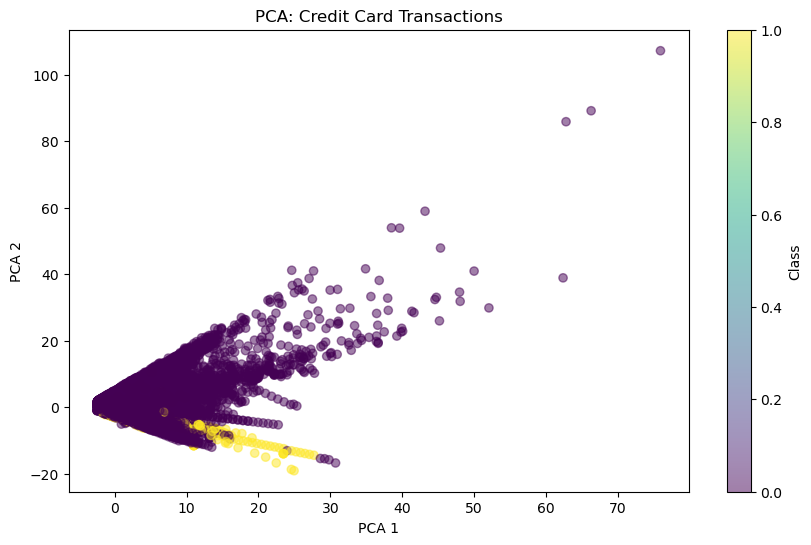

In [4]:
pca = PCA(n_components=2, random_state=42)
pca_results = pca.fit_transform(x)

plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA: Credit Card Transactions')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Class')
plt.show()

c:\Users\vikky\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


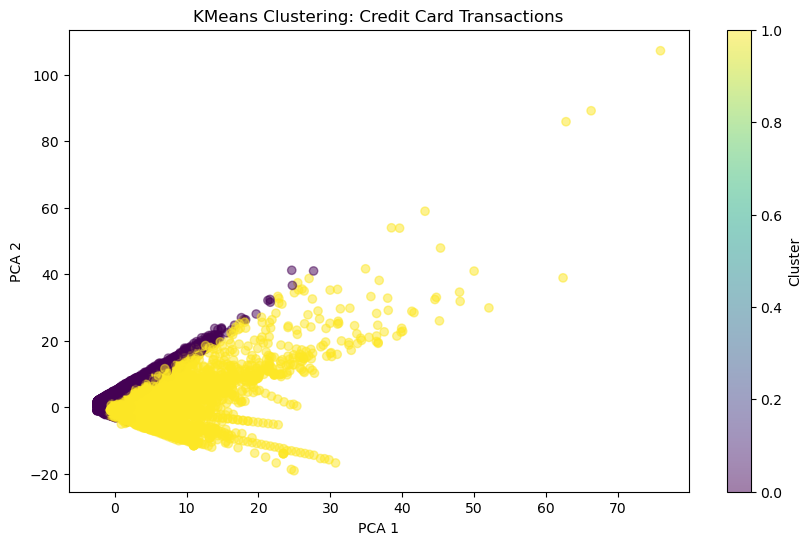

In [5]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(x)

df['Cluster'] = model.labels_

plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering: Credit Card Transactions')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.47      0.64    284315
           1       0.00      0.73      0.00       492

    accuracy                           0.47    284807
   macro avg       0.50      0.60      0.32    284807
weighted avg       1.00      0.47      0.64    284807



Text(0.5, 1.0, 'Confusion Matrix')

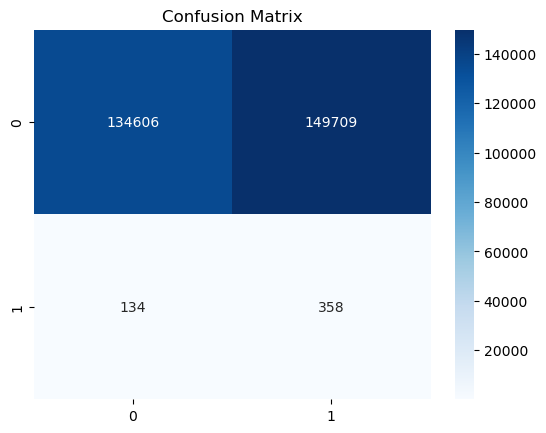

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

print(classification_report(df['Class'], df['Cluster']))
sns.heatmap(confusion_matrix(y, df['Cluster']), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.33      0.34      0.33        98

    accuracy                           1.00     56962
   macro avg       0.66      0.67      0.67     56962
weighted avg       1.00      1.00      1.00     56962



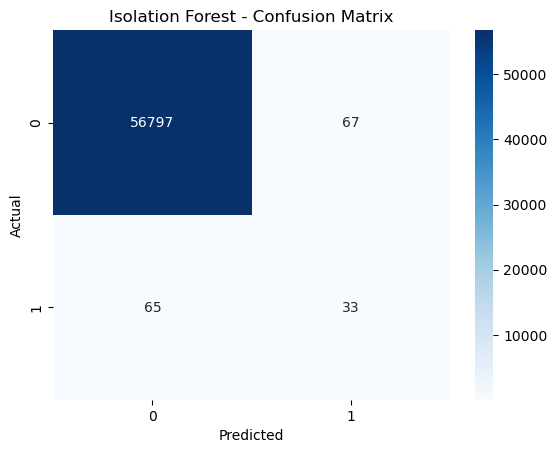

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_if = IsolationForest(contamination=0.0017, random_state=42)
model_if.fit(X_train)

y_pred = model_if.predict(X_test)
y_pred = [1 if i == -1 else 0 for i in y_pred]
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Isolation Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

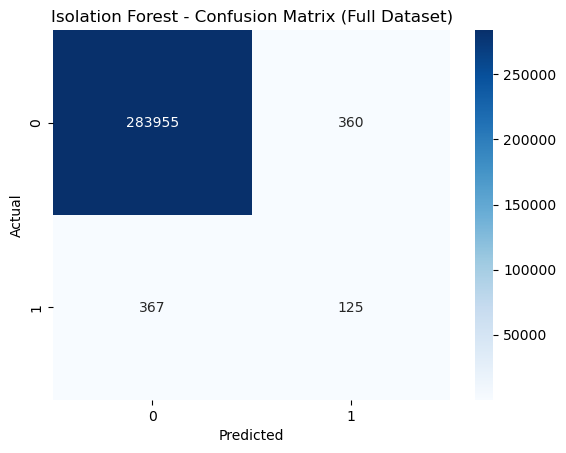

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.25      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807



In [8]:
model_if_full = IsolationForest(contamination=0.0017, random_state=42)
model_if_full.fit(x)

y_pred_full = model_if_full.predict(x)
y_pred_full = [1 if i == -1 else 0 for i in y_pred_full]

cm = confusion_matrix(y, y_pred_full)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Isolation Forest - Confusion Matrix (Full Dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print(classification_report(y, y_pred_full))